In [6]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import image_dataset_from_directory
print(tf.__version__)

2.17.0


In [7]:
import os

base_dir = "cats_and_dogs_filtered"
print("Contents of base directory:")
print(os.listdir(base_dir))

print("\nContents of train directory:")
print(os.listdir(f'{base_dir}/train'))

print("\nContents of validation directory:")
print(os.listdir(f'{base_dir}/validation'))

Contents of base directory:
['train', 'validation', 'vectorize.py']

Contents of train directory:
['cats', 'dogs']

Contents of validation directory:
['cats', 'dogs']


In [8]:
train_dir = os.path.join(base_dir, "train")
validation_dir = os.path.join(base_dir, "validation")

train_cat_dir = os.path.join(train_dir, "cats")
train_dog_dir = os.path.join(train_dir, "dogs")

validation_cat_dir = os.path.join(validation_dir, "cats")
validation_dog_dir = os.path.join(validation_dir, "dogs")


In [9]:
train_cat_fnames = os.listdir( train_cat_dir)
train_dog_fnames = os.listdir( train_dog_dir )

print(train_cat_fnames[:10])
print(train_dog_fnames[:10])

['cat.0.jpg', 'cat.1.jpg', 'cat.10.jpg', 'cat.100.jpg', 'cat.101.jpg', 'cat.102.jpg', 'cat.103.jpg', 'cat.104.jpg', 'cat.105.jpg', 'cat.106.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [10]:
print("Number of Training Cat Images:", len(train_cat_fnames))
print("Numebr of Training Dog Images:", len(train_dog_fnames))

print("Number of Validation Cat Images:", len( os.listdir( validation_cat_dir)))
print("Numebr of Validation Dog Images:", len( os.listdir( validation_dog_dir)))

Number of Training Cat Images: 1000
Numebr of Training Dog Images: 1000
Number of Validation Cat Images: 500
Numebr of Validation Dog Images: 500


In [11]:
image_size = ((150,150))
BATCH_SIZE = 20

In [12]:
def preprocess(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

In [13]:
train_datagen = image_dataset_from_directory(
    train_dir,
    batch_size=20,
    image_size=image_size
)

validation_datagen = image_dataset_from_directory(
    validation_dir,
    batch_size=20,
    image_size=image_size
)

Found 2000 files belonging to 2 classes.
Found 1000 files belonging to 2 classes.


In [14]:
class_names = train_datagen.class_names
print(class_names)

['cats', 'dogs']


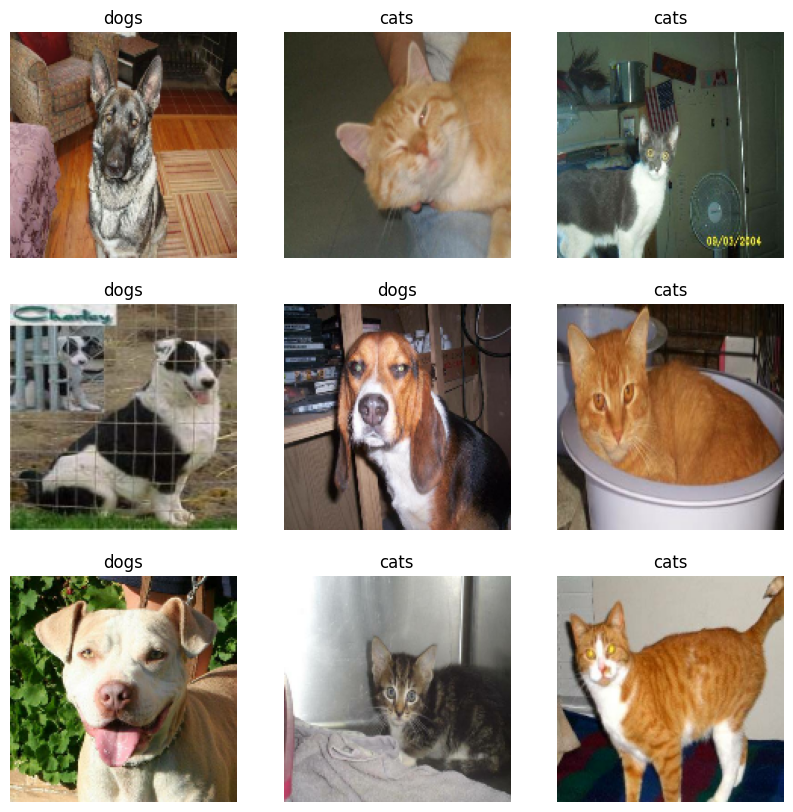

In [15]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,10))
for images,labels in train_datagen.take(1):
    for i in range(9):
        ax = plt.subplot(3,3,i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

In [16]:
for image_batch, labels_batch in train_datagen:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(20, 150, 150, 3)
(20,)


In [24]:
data_augmentation = keras.models.Sequential([
    keras.layers.Rescaling(1./255),
    keras.layers.RandomRotation(0.1),  # rotation_range=40 corresponds to 0.1 in radians
    keras.layers.RandomTranslation(width_factor=0.2, height_factor=0.2),
    keras.layers.RandomZoom(0.2),
    keras.layers.RandomFlip("horizontal"),
])

In [25]:
data_augmentation.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ rescaling_1 (Rescaling)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_rotation_1               │ ?                      │   0 (unbuilt) │
│ (RandomRotation)                │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_translation              │ ?                      │   0 (unbuilt) │
│ (RandomTranslation)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_zoom_1 (RandomZoom)      │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ random_flip_1 (RandomFlip)      │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [26]:
model = keras.models.Sequential(
    [
        keras.layers.InputLayer(shape=(150,150,3)),
        data_augmentation,
        keras.layers.Conv2D(16, (3,3), activation="relu"),
        keras.layers.MaxPooling2D(2,2),

        keras.layers.Conv2D(32, (3,3), activation="relu"),
        keras.layers.MaxPooling2D(2,2),

        keras.layers.Conv2D(64, (3,3), activation="relu"),
        keras.layers.MaxPooling2D(2,2),

        keras.layers.Flatten(),
        keras.layers.Dense(512, activation="relu"),
        keras.layers.Dense(1, activation="sigmoid")
    ]
)

In [27]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_2 (Sequential)       │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 148, 148, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 74, 74, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 72, 72, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 36, 36, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 34, 34, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 17, 17, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 18496)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │     9,470,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │           513 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 9,494,561 (36.22 MB)

 Trainable params: 9,494,561 (36.22 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
from tensorflow.keras.optimizers import RMSprop

model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [29]:
history = model.fit(train_datagen,
                    validation_data=validation_datagen,
                    epochs=10)

#steps_per_epoch = 100, 2000 Images= batch_size *steps

Epoch 1/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 64s 423ms/step - accuracy: 0.5364 - loss: 0.7650 - val_accuracy: 0.6080 - val_loss: 0.6816
Epoch 2/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 32s 319ms/step - accuracy: 0.5674 - loss: 0.6937 - val_accuracy: 0.6150 - val_loss: 0.6532
Epoch 3/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 18s 184ms/step - accuracy: 0.6472 - loss: 0.6546 - val_accuracy: 0.6530 - val_loss: 0.6256
Epoch 4/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 187ms/step - accuracy: 0.6533 - loss: 0.6281 - val_accuracy: 0.6530 - val_loss: 0.6285
Epoch 5/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 186ms/step - accuracy: 0.6600 - loss: 0.6297 - val_accuracy: 0.6480 - val_loss: 0.6040
Epoch 6/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 189ms/step - accuracy: 0.6885 - loss: 0.5948 - val_accuracy: 0.6630 - val_loss: 0.6018
Epoch 7/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 19s 186ms/step - accuracy: 0.6630 - loss: 0.6164 - val_accuracy: 0.6720 - val_loss: 0.6004
Epoch 8/10
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 195ms/step - accuracy: 0.6880 - loss: 0

Text(0.5, 1.0, 'Training and validation loss')

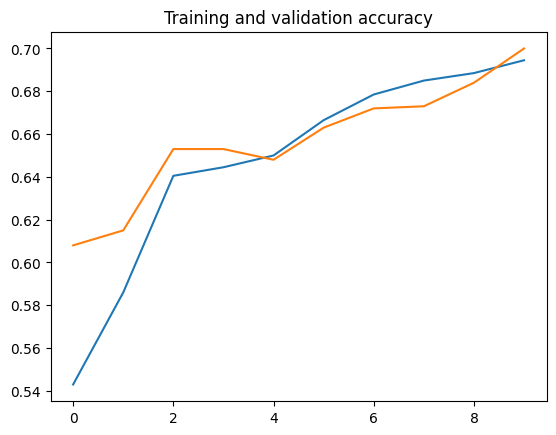

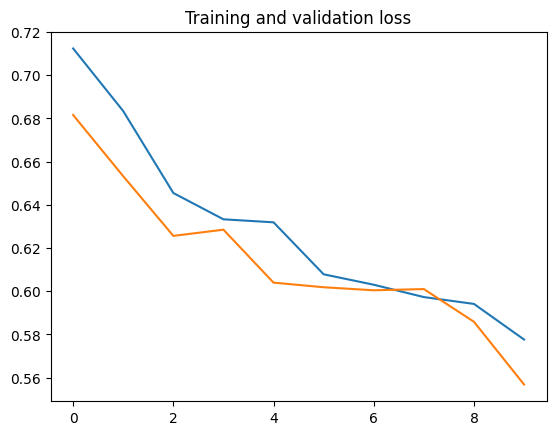

In [30]:
#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
acc      = history.history['accuracy' ]
val_acc  = history.history['val_accuracy' ]
loss     = history.history['loss']
val_loss = history.history['val_loss' ]

epochs   = range(len(acc)) # Get number of epochs

#------------------------------------------------
# Plot training and validation accuracy per epoch
#------------------------------------------------
plt.plot  (epochs,acc )
plt.plot  (epochs,val_acc )
plt.title ('Training and validation accuracy')
plt.figure()

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot  ( epochs,     loss )
plt.plot  ( epochs, val_loss )
plt.title ('Training and validation loss'   )

In [118]:
from tensorflow.keras.utils import load_img, img_to_array
import numpy as np
import os

  # predicting images
path= "test_images/images.jpg"

img=load_img(path, target_size=(150, 150))

x=img_to_array(img)
x /= 255
print("Before expand_dims:",x.shape)
x=np.expand_dims(x, axis=0)
print("After expand_dims:",x.shape)
# images = np.vstack([x])

classes = model.predict(x, batch_size=10)

print(classes)

if classes[0]>0.5:
    print(" is a dog")
else:
    print(" is a cat")

Before expand_dims: (150, 150, 3)
After expand_dims: (1, 150, 150, 3)
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
[[4.5503242e-07]]
 is a cat
